# CARGA DE DATOS

__TODO__

In [2]:
from Utils import DatasetProcess, reconstruction_plot
from AutoEncoder import TwoStepAutoEncoder, TwoStepClassifier, TwoStepTraining, OneStepAutoencoder, OneStepTraining
from OneClass import AnomalyDetector
from Contrastive import ContrastiveModel

In [3]:
unlabeled_train, x_train, y_train, x_test, y_test, one_hot_train, one_hot_test = DatasetProcess.alt()

# EJERCICIO 1

Entrena un modelo, creado sobre TensorFlow, haciendo uso únicamente de las instancias etiquetadas de entrenamiento. Dicho modelo debe de tener al menos cuatro capas densas y/o convolucionales.

Responde a las siguientes preguntas:

1. ¿Qué red has escogido? ¿Por qué? ¿Cómo la has entrenado?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Qué conclusiones sacas de los resultados detallados en el punto anterior?

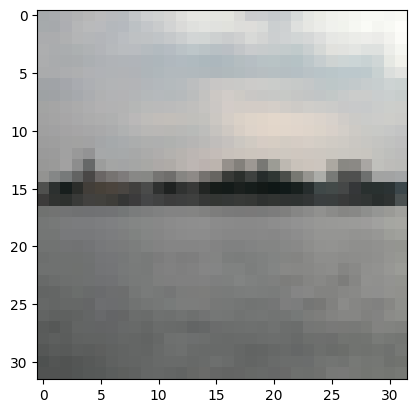

# EJERCICIO 2

Entrena el mismo modelo, incorporando las instancias no etiquetadas de entrenamiento mediante la técnica de auto-aprendizaje. Opcionalmente, se ponderará cada instancia de entrada en función de su calidad (o certeza).

Responde a las siguientes preguntas:
1. ¿Qué parámetros has definido para el entrenamiento?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en el Ejercicio 1?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

# EJERCICIO 3

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en dos pasos (primero el autoencoder, después el clasificador). La arquitectura del encoder debe ser exactamente la misma que la definida en los Ejercicios 1 y 2, a excepción del último bloque de capas.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los Ejercicios 1 y 2?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [5]:
autoencoder = TwoStepAutoEncoder(input_shape=unlabeled_train[0].shape,
                                learning_rate=0.0015,
                                l2_lambda=0.01,
                                dropout_prob=0.1)
classifier = TwoStepClassifier()

In [6]:
TwoStepTraining(autoencoder=autoencoder, 
                classifier=classifier, 
                x_train=x_train, 
                y_train=one_hot_train, 
                unlabeled_train=unlabeled_train, 
                batch_size_autoencoder=256,
                epochs_autoencoder=3,
                batch_size_classifier=4096,
                epochs_classifier=405)

Epoch 1/15


2025-04-02 23:32:13.600054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 15/196 ━━━━━━━━━━━━━━━━━━━━ 14:49 5s/step - loss: 6.5585

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


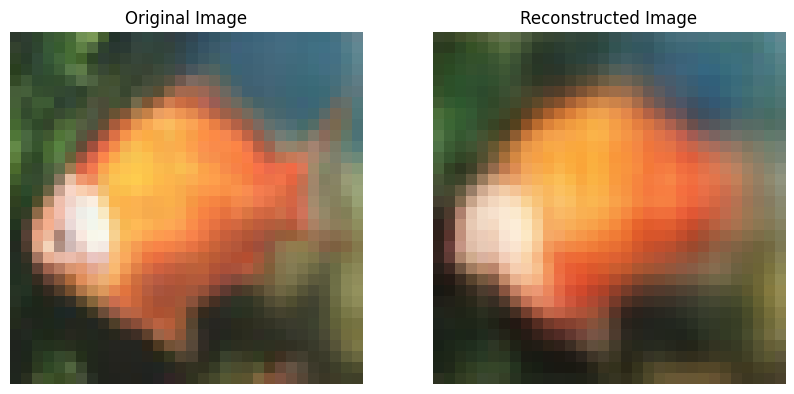

In [15]:
reconstruction_plot(autoencoder, x_test)

In [ ]:
autoencoder.score(x_test)

# EJERCICIO 4

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en un paso (autoencoder y clasificador al mismo tiempo). La arquitectura del autoencoder será la misma que la definida en el Ejercicio 3, y la combinación de encoder y clasificador será igual a la arquitectura definida en el
Ejercicio 1.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los ejercicios anteriores?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [4]:
one_step_autoencoder = OneStepAutoencoder(input_shape=unlabeled_train[0].shape,
                                learning_rate=0.0015,
                                decoder_extra_loss_weight = 0.3)

In [5]:
h = OneStepTraining(one_step_autoencoder, 
                    x_train=x_train, 
                    y_train=one_hot_train, 
                    unlabeled_train=unlabeled_train,
                    batch_size=256,
                    epochs=3,
                    patience=10)

Epoch 1/3


2025-04-02 11:31:19.217127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


196/196 ━━━━━━━━━━━━━━━━━━━━ 152s 757ms/step - classifier_accuracy: 0.0116 - classifier_loss: 0.0856 - decoder_loss: 0.0251 - loss: 0.0926    
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 151s 769ms/step - classifier_accuracy: 0.0149 - classifier_loss: 0.0569 - decoder_loss: 0.0131 - loss: 0.0569
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 155s 792ms/step - classifier_accuracy: 0.0329 - classifier_loss: 0.0272 - decoder_loss: 0.0113 - loss: 0.0337


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


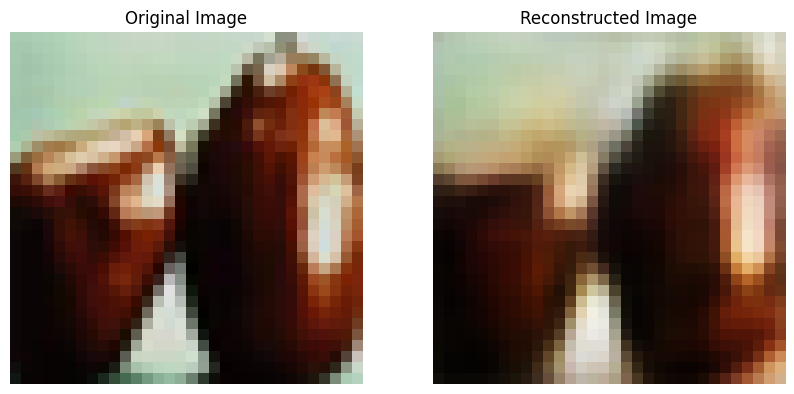

In [26]:
reconstruction_plot(one_step_autoencoder, x_test)

In [ ]:
one_step_autoencoder.score(x_test)

# EJERCICIO 5

Repite el mismo entrenamiento de los Ejercicios 1-4, pero eliminando las instancias no etiquetadas
más atípicas con respecto a los datos etiquetados. Se cumplirán los siguientes puntos:
- La arquitectura de la red de clasificación en una clase será la misma a la utilizada en el
clasificador del Ejercicio 1, a excepción de la capa de salida.
- Utiliza la técnica explicada en el Notebook 5, usando un valor de 𝑣 = 0,9.

Responde a la siguiente pregunta:
1. ¿Se mejoran los resultados con respecto a los anteriores ejercicios? ¿Qué conclusiones sacas de estos resultados?

In [3]:
model = AnomalyDetector(input_shape=(32,32,3), 
                        nu=.9,
                        l2_lambda=0.0,
                        learning_rate=0.0001,
                        dropout_prob=0.1)
model.fit(x_train, 
          batch_size=256, 
          epochs=50, 
          delta=.025, 
          steps=100)

/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-02 11:54:37.288754: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-02 11:54:37.288780: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-02 11:54:37.288786: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-02 11:54:37.288801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-02 11:54:37.288814: I tensorflow/core/common_runtime/pluggable_device/pluggable_devi

Epoch 1/50


2025-04-02 11:54:37.970857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step  loss: 0.7178
Cambiando r a 0.5328783 , max: 0.5992215 , min: 0.5122667
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 652ms/step - loss: 0.6868
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0133
Cambiando r a 0.5568626 , max: 0.6665995 , min: 0.51814854
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0122
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 5.7473e-04
Cambiando r a 0.550461 , max: 0.69751024 , min: 0.49714294
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 5.1290e-04
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0000e+00
Cambiando r a 0.5267882 , max: 0.70606005 , min: 0.4647589
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0000e+00
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0000e+00
Cambiando r a 0.49288738 , max: 0.70016086 , min: 0.42564684
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0000e+00
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0000e+00
Cambiando r a 0.45225528 , max: 

<Sequential name=sequential, built=True>

In [4]:
import numpy as np

# TODO: Evalúa el modelo con los datos del conjunto de test. Indica el porcentaje de datos etiquetados como típicos, y visualiza los datos
predicciones = model.predict(x_test)

# Determinamos qué datos son típicos (normales) y cuáles son anomalías
# Un dato es típico si su predicción es mayor que r
r_valor = model.model.r.numpy()
es_tipico = predicciones > r_valor

# Calculamos el porcentaje de datos etiquetados como típicos
porcentaje_tipicos = np.mean(es_tipico) * 100

print(f"Valor de r: {r_valor:.4f}")
print(f"Porcentaje de datos etiquetados como típicos: {porcentaje_tipicos:.2f}%")
print(f"Porcentaje de datos etiquetados como anomalías: {100 - porcentaje_tipicos:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 
Valor de r: 0.0040
Porcentaje de datos etiquetados como típicos: 88.42%
Porcentaje de datos etiquetados como anomalías: 11.58%


In [5]:
np.unique(predicciones)

array([0.0023041 , 0.00237586, 0.00239053, ..., 0.02093024, 0.02126487,
       0.02391375], dtype=float32)

In [ ]:
# TODO: Evalúa el modelo con los datos del conjunto de outliers. Indica el porcentaje de datos etiquetados como atípicos, y visualiza los datos en conjunto con los de test
predicciones_outliers = model.predict(x_outliers)
r_valor = model.model.r.numpy()
es_atipico_outliers = predicciones_outliers <= r_valor
porcentaje_atipicos_outliers = np.mean(es_atipico_outliers) * 100

# Evaluamos también los datos de test para comparar
predicciones_test = model.predict(x_test)
es_atipico_test = predicciones_test <= r_valor

print(f"Porcentaje de outliers etiquetados como atípicos: {porcentaje_atipicos_outliers:.2f}%")

# EJERCICIO 6

Repite los Ejercicios 3-5 cambiando el autencoder por la técnica definida en el apartado “Hay vida más allá del autoencoder” del Notebook 4. Contesta a las preguntas de dichos ejercicios. Se cumplirán los siguientes puntos:

1. La arquitectura de la red será igual a la parte encoder del autencoder definido en los
ejercicios anteriores.
2. El modelo debe entrenar correctamente.

In [1]:
from Contrastive import ContrastiveModel
from Utils import DatasetProcess

unlabeled_train, x_train, y_train, x_test, y_test, one_hot_train, one_hot_test = DatasetProcess.alt()

2025-04-02 22:27:46.126907: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-02 22:27:46.127005: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-02 22:27:46.127046: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-02 22:27:46.127362: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-02 22:27:46.127433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20, Total Loss: 27.6605, Contrastive Loss: 6.1427, Clustering Loss: 2.1518
Epoch 2/20, Total Loss: 5.9015, Contrastive Loss: 5.8652, Clustering Loss: 0.0036
Epoch 3/20, Total Loss: 5.6518, Contrastive Loss: 5.6108, Clustering Loss: 0.0041
Epoch 4/20, Total Loss: 5.4492, Contrastive Loss: 5.4069, Clustering Loss: 0.0042
Epoch 5/20, Total Loss: 5.3504, Contrastive Loss: 5.3155, Clustering Loss: 0.0035
Epoch 6/20, Total Loss: 5.2934, Contrastive Loss: 5.2624, Clustering Loss: 0.0031
Epoch 7/20, Total Loss: 5.2569, Contrastive Loss: 5.2284, Clustering Loss: 0.0028
Epoch 8/20, Total Loss: 5.2326, Contrastive Loss: 5.2061, Clustering Loss: 0.0026
Epoch 9/20, Total Loss: 5.2169, Contrastive Loss: 5.1923, Clustering Loss: 0.0025
Epoch 10/20, Total Loss: 5.2075, Contrastive Loss: 5.1842, Clustering Loss: 0.0023
Epoch 11/20, Total Loss: 5.2006, Contrastive Loss: 5.1782, Clustering Loss: 0.0022
Epoch 12/20, Total Loss: 5.1919, Contrastive Loss: 5.1700, Clustering Loss: 0.0022
Epoch 13/20,

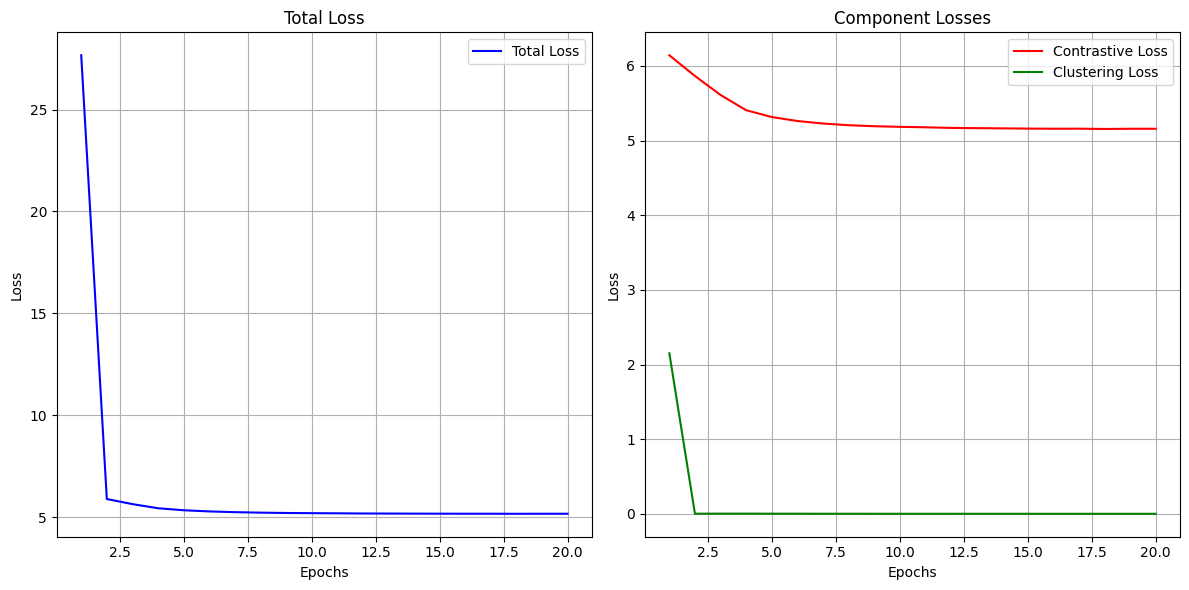

In [2]:
cModel = ContrastiveModel(unlabeled_train[0].shape, 
                          learning_rate=0.005, 
                          lambda_param=100,
                          l2_lambda=0.05)
cModel.train(unlabeled_train, 
             epochs=20, 
             batch_size=512,
             temperature=0.9)
cModel.plot_training_history()

In [ ]:
n_samples = 100
test_samples = x_test[:n_samples].reshape(n_samples,32,32,3)

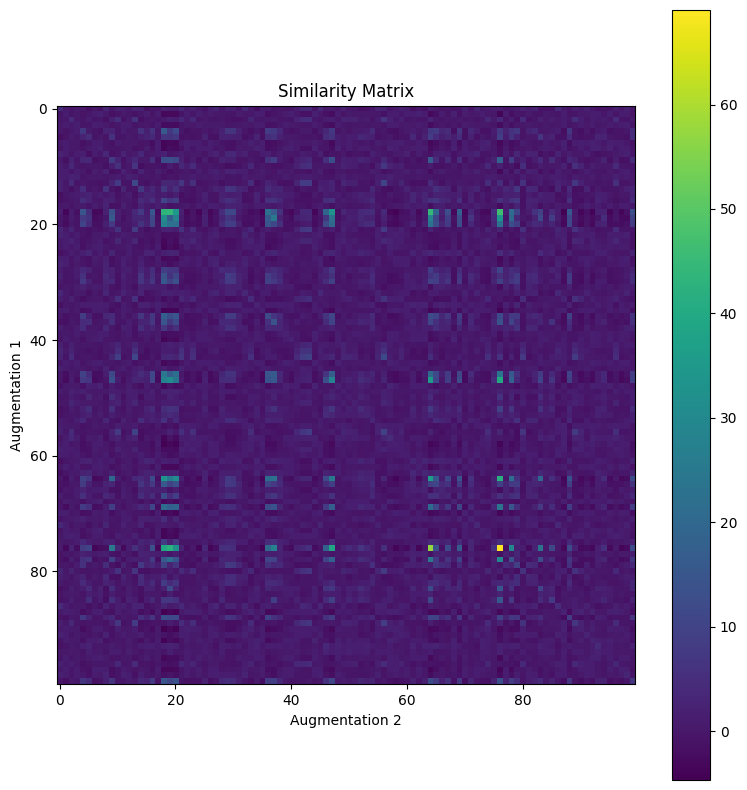

In [6]:
n_samples = 100
test_samples = x_test[:n_samples].reshape(n_samples,32,32,3)

cModel.plot_similarity_matrix(test_samples, n_samples=n_samples);

In [6]:
im = x_test[0]
imDA1 = cModel.data_augmentation_1(im.reshape(1,32,32,3))
imDA2 = cModel.data_augmentation_2(im.reshape(1,32,32,3))

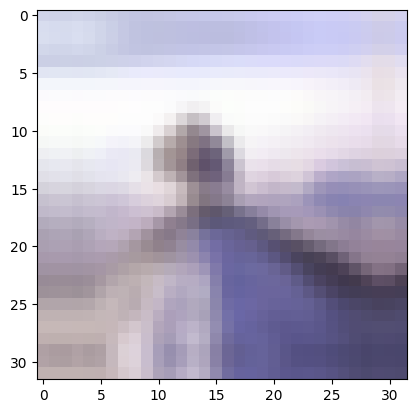

In [7]:
import matplotlib.pyplot as plt
plt.imshow(imDA1.numpy().reshape(32,32,3))

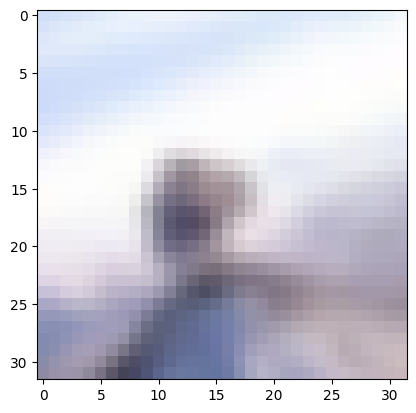

In [8]:
plt.imshow(imDA2.numpy().reshape(32,32,3))

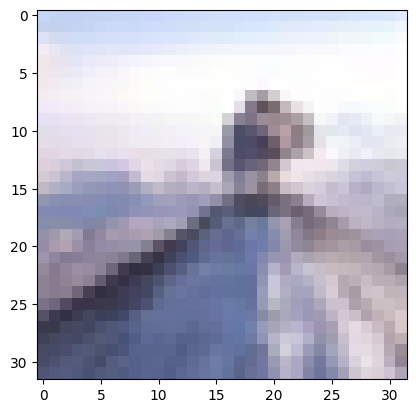

In [9]:
plt.imshow(im)

74
74
74


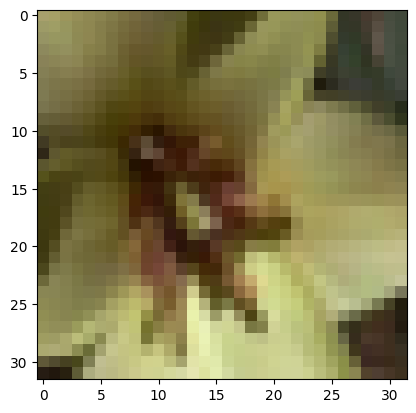

In [32]:
import numpy as np

im = x_test[5]
imDA1 = cModel.data_augmentation_1(im.reshape(1,32,32,3))
imDA2 = cModel.data_augmentation_2(im.reshape(1,32,32,3))

print(np.argmax(cModel(im.reshape(1,32,32,3))[0].numpy()))
print(np.argmax(cModel(imDA1.numpy().reshape(1,32,32,3))[0].numpy()))
print(np.argmax(cModel(imDA2.numpy().reshape(1,32,32,3))[0].numpy()))

plt.imshow(im)